In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from collections import defaultdict

## Loading Data

In [2]:
train = np.load('fashion_train.npy')
test = np.load('fashion_test.npy')


## Finding X,Y and mean vectos

In [3]:
def find_x_y(data):
    Y = data[:,-1]
    X = np.delete(data,-1,axis=1)
    mean_vectors = []
    scaler = StandardScaler()
    X= scaler.fit_transform(X)
    for cl in range(5):
        mean_vectors.append(np.mean(X[Y==cl],axis=0))
    return X,Y,mean_vectors


label_dict = {0:'T_shirts', 1:'Trouseres', 2:'Pullover', 3: 'Dress', 4:'Shirt'}

train_X, train_y, train_mean_vec = find_x_y(train)
test_X, test_y, test_mean_vec = find_x_y(test)




## Finding the Within scatter matrix

In [3]:
def find_S_W(X,Y,mean_vectors):
    S_W = np.zeros((784,784))
    for cl,mv in zip(range(5),mean_vectors):
        class_sc_mat = np.zeros((784,784))
        for row in X[Y==cl]:
            row,mv = row.reshape(784,1),mv.reshape(784,1)
            class_sc_mat+= (row-mv).dot((row-mv).T)
        S_W += class_sc_mat
    return S_W
    
train_SW = find_S_W(train_X,train_y, train_mean_vec)
test_SW = find_S_W(test_X,test_y,test_mean_vec)


NameError: name 'train_X' is not defined

## Adding Variance to find iverse of S_W

In [2]:
for i in range(784):
    test_SW[i][i]=test_SW[i][i]+0.00000000000000000000001

NameError: name 'test_SW' is not defined

## Finding the between class scatterd Matrix


In [6]:
def find_S_B(X,Y, mean_vectors):
    overall_mean = np.mean(X,axis= 0)
    S_B = np.zeros((784,784))
    for i,mean_vec in enumerate(mean_vectors):
        n=X[Y==i,:].shape[0]
        mean_vec=mean_vec.reshape(784,1)
        overall_mean = overall_mean.reshape(784,1)
        S_B+=n*(mean_vec-overall_mean).dot((mean_vec-overall_mean).T)
    return S_B

train_SB = find_S_B(train_X, train_y, train_mean_vec)
test_SB = find_S_B(test_X,test_y,test_mean_vec)

## Finding Eigenvectors, Eigenvalues and their influence on the variance

In [7]:
def find_eigen(S_W,S_B):
    eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
    eigen_pairs = [(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]
    eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse= True)
    eigenvalues_sum = sum(eigenvalues)
    for i, j in enumerate(eigen_pairs):
        print ("Eigenvalue {0:}: {1:.2%}". format(i,(j[0]/eigenvalues_sum).real))
    return eigen_pairs

train_pairs = find_eigen(train_SW, train_SB)
test_pairs = find_eigen(test_SW,test_SB)

Eigenvalue 0: 61.11%
Eigenvalue 1: 20.24%
Eigenvalue 2: 13.13%
Eigenvalue 3: 5.52%
Eigenvalue 4: 0.00%
Eigenvalue 5: 0.00%
Eigenvalue 6: 0.00%
Eigenvalue 7: 0.00%
Eigenvalue 8: 0.00%
Eigenvalue 9: 0.00%
Eigenvalue 10: 0.00%
Eigenvalue 11: 0.00%
Eigenvalue 12: 0.00%
Eigenvalue 13: 0.00%
Eigenvalue 14: 0.00%
Eigenvalue 15: 0.00%
Eigenvalue 16: 0.00%
Eigenvalue 17: 0.00%
Eigenvalue 18: 0.00%
Eigenvalue 19: 0.00%
Eigenvalue 20: 0.00%
Eigenvalue 21: 0.00%
Eigenvalue 22: 0.00%
Eigenvalue 23: 0.00%
Eigenvalue 24: 0.00%
Eigenvalue 25: 0.00%
Eigenvalue 26: 0.00%
Eigenvalue 27: 0.00%
Eigenvalue 28: 0.00%
Eigenvalue 29: 0.00%
Eigenvalue 30: 0.00%
Eigenvalue 31: 0.00%
Eigenvalue 32: 0.00%
Eigenvalue 33: 0.00%
Eigenvalue 34: 0.00%
Eigenvalue 35: 0.00%
Eigenvalue 36: 0.00%
Eigenvalue 37: 0.00%
Eigenvalue 38: 0.00%
Eigenvalue 39: 0.00%
Eigenvalue 40: 0.00%
Eigenvalue 41: 0.00%
Eigenvalue 42: 0.00%
Eigenvalue 43: 0.00%
Eigenvalue 44: 0.00%
Eigenvalue 45: 0.00%
Eigenvalue 46: 0.00%
Eigenvalue 47: 0.00%

## Making the eigenvector matrix

In [8]:
W_train = np.hstack((train_pairs[0][1].reshape(784,1),train_pairs[1][1].reshape(784,1)))
W_test =  np.hstack((test_pairs[0][1].reshape(784,1),test_pairs[1][1].reshape(784,1)))

## Transforming the data to a 2d space

In [9]:
X_train_lda = train_X.dot(W_train)
X_test_lda=test_X.dot(W_test)


# Plotting the data

In [10]:
def plot_step_lda(X_lda,Y):
    for label, color in zip(range(5),("blue","red","purple","green","orange")):
        plt.scatter(x=X_lda[:,0].real[Y==label],
        y = (X_lda[:,1].real[Y==label]), color = color , alpha=0.5, label = label_dict[label])

    plt.xlabel("LD1")
    plt.ylabel("LD2")
    leg = plt.legend(loc= "upper left", fancybox = True)
    leg.get_frame().set_alpha(0.5)
    plt.title("LDA: Clothes onto the first two linear discrimineant")



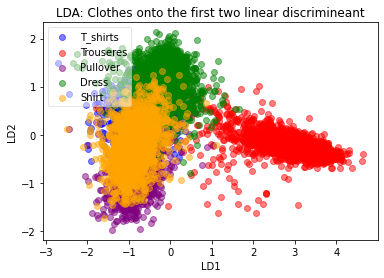

In [11]:
plot_step_lda(X_train_lda,train_y)

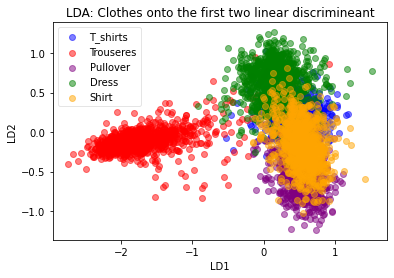

In [12]:
plot_step_lda(X_test_lda,test_y)

In [13]:
X_train_lda[:,0]

array([-1.23149779+0.j,  2.49507967+0.j, -0.93425513+0.j, ...,
       -0.10597058+0.j, -0.68637265+0.j,  3.01065924+0.j])

## Histogram of data

<AxesSubplot:ylabel='Count'>

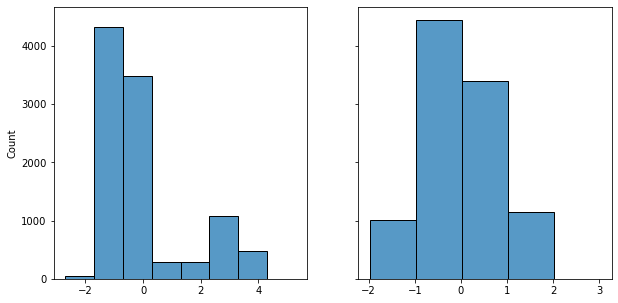

In [14]:
fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)


sns.histplot(x=X_train_lda[:,0].real, binwidth=1, ax = axs[0])
sns.histplot(x=X_train_lda[:,1].real, binwidth= 1, ax=axs[1])

## Gausian curve of data

<AxesSubplot:ylabel='Density'>

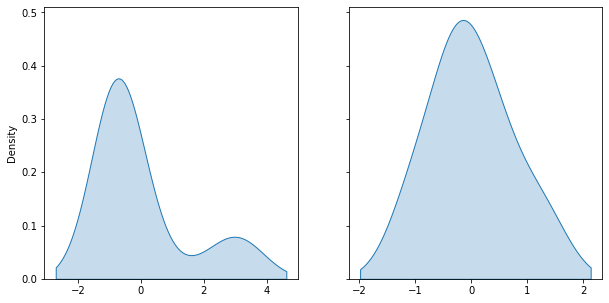

In [15]:
fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)

sns.kdeplot(x=X_train_lda[:,0].real, ax=axs[0], fill = True, bw_method= 1/2, cut = 0)

sns.kdeplot(x=X_train_lda[:,1].real, ax=axs[1], fill = True, bw_method= 1/2, cut = 0)

## Naive Bayes Classifier implementation

In [16]:


class GaussianNaiveBayes:
    def __init__(self):
        self.class_probs = defaultdict(float)
        self.mean = defaultdict(float)
        self.variance = defaultdict(float)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        unique_classes = np.unique(y)

        for c in unique_classes:
            X_c = X[y == c]
            self.class_probs[c] = len(X_c) / n_samples
            self.mean[c] = np.mean(X_c, axis=0)
            self.variance[c] = np.var(X_c, axis=0)

    def _calculate_likelihood(self, x, mean, variance):
        exponent = np.exp(-(x - mean)**2 / (2 * variance))
        return (1 / np.sqrt(2 * np.pi * variance)) * exponent

    def predict(self, X):
        predictions = []
        for x in X:
            class_probs = []
            for c in self.class_probs:
                prior = np.log(self.class_probs[c])
                likelihood = np.sum(np.log(self._calculate_likelihood(x, self.mean[c], self.variance[c])))
                class_probs.append(prior + likelihood)

            predicted_class = max(self.class_probs.keys(), key=lambda c: class_probs[c])
            predictions.append(predicted_class)
        return predictions



In [17]:
X_test_lda[:,0]=X_test_lda[:,0]*-1

In [18]:
Bayes = GaussianNaiveBayes()
Bayes.fit(X_train_lda.real, train_y)
Pred = Bayes.predict(X_test_lda)
Correct= np.array(Pred==test_y)

In [22]:
np.sum(Correct)/Correct.shape

array([0.7268])

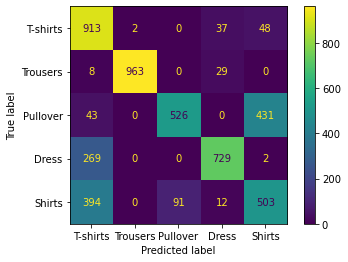

In [23]:
confusion_matrix = metrics.confusion_matrix(test_y,Pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['T-shirts','Trousers','Pullover','Dress','Shirts'])
cm_display.plot()

In [19]:
print(metrics.classification_report(test_y,Pred))


              precision    recall  f1-score   support

           0       0.56      0.91      0.70      1000
           1       1.00      0.96      0.98      1000
           2       0.85      0.53      0.65      1000
           3       0.90      0.73      0.81      1000
           4       0.51      0.50      0.51      1000

    accuracy                           0.73      5000
   macro avg       0.77      0.73      0.73      5000
weighted avg       0.77      0.73      0.73      5000

